# Chronic kidney disease prediction & Data Analysis

#                          Abstract

            The goal of a chronic kidney disease prediction project would be to develop a model or algorithm that can identify individuals at risk for CKD based on their medical history, lifestyle factors, and other relevant information. This could help healthcare providers identify and intervene with at-risk individuals earlier, potentially improving their health outcomes and reducing the burden of CKD on the healthcare system

# 1.Introduction

 
                Chronic kidney disease (CKD) is a serious health condition that affects millions of people worldwide. It is important to understand the risk factors for CKD and to develop effective interventions for preventing and managing the disease. 

                            In our project we use logistic regression since we have binary outcome and it not complicated to fit liear seperable line or plane.Logistic regression is a statistical method that can be used to predict the likelihood of an event occurring, given a set of independent variables. In the context of chronic kidney disease (CKD) prediction, logistic regression could be used to predict the likelihood of an individual developing CKD, based on various risk factors such as age, blood pressure, diabetes status, and other variables.
           We used various methods to improve the output of logistic regression, selecting the best number of features and PCA with optimum number of features               


# 2. Methodology 


1. First step in for statistical analysis is normality tese, here I performed univariate normality check using shapiro test & multi_variate normality check :
                 The Shapiro test, also known as the Shapiro-Wilk test, is a statistical test used to determine whether a sample of data comes from a normally distributed population. It is often used to assess the normality of data before conducting statistical tests that assume the data are normally distributed, such as t-tests and ANOVA.
                 
2. For comparing two means The Mann-Whitney Test :
                The Mann-Whitney test, also known as the Wilcoxon rank-sum test, is a nonparametric statistical test used to compare the medians of two independent samples. It is often used as an alternative to the t-test when the data are not normally distributed or when the variances of the two samples are not equal.
                H0: The two populations are equal versus

                H1: The two populations are not equal.

3. One-way Anove : 
                    The Kruskal-Wallis test, also known as the one-way analysis of variance (ANOVA) on ranks, is a nonparametric statistical test used to compare the medians of two or more independent samples. It is often used as an alternative to the one-way ANOVA when the data are not normally distributed or when the variances of the samples are not equal.
                    
                    H0: μ1 =μ2 =···=μI 
                    H1: at least two means differ
                    
4. Nemenyi Test: 
                The Friedman Test is used to find whether there exists a significant difference between the means of more than two groups. In such groups, the same subjects show up in each group. If the p-value of the Friedman test turns out to be statistically significant then we can conduct the Nemenyi test to find exactly which groups are different. This test is also known as Nemenyi post-hoc test.
                
                
                
5.Logistic regression : 
                        
                        To evaluate the performance of the logistic regression model, you can use various metrics such as accuracy, precision, and recall. These metrics can help you understand how well the model is able to predict the likelihood of an individual developing CKD, and whether there is room for improvement.

                                                Overall, logistic regression can be a useful tool for predicting the likelihood of an individual developing CKD, and it can help healthcare providers identify individuals at risk of the disease so that preventive measures can be taken.

6.PCA : 
            
            Principal component analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset by projecting the data onto a lower-dimensional space. It is often used as a data preprocessing step to reduce the complexity of the data and make it more amenable to analysis.

# 3. Data descrption

    1.Data is taken from: https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

    2.Original data is having many rows with missing values, I have cleaned such that there are no missing values.

    3. Data set has total size has 158 Rows X  25 Columns , each column is renamed with appropriate medical name.
    
    4. 10 columns are categorical with 2 categories each and 15 are numrical.
    
    5. There are some columns with more than 0.8 correlation between them.
    
    6. Categorical columns are mapped with appropriate numbers as per code given below
    
    7.From distibution graphs we can observe that data in non-normal.

In [1]:
#importig required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import mannwhitneyu


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.decomposition import PCA

from pingouin import multivariate_normality

In [2]:
data = pd.read_csv('ckd_clean.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1


In [5]:
cat_df = df.select_dtypes(['object'])
cat_df.columns,len(cat_df.columns)

(Index(['Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
        'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
        'Appetite', 'Pedal Edema', 'Anemia'],
       dtype='object'),
 10)

In [6]:
num_df = df.select_dtypes(['float','int'])
num_df.columns , len(num_df.columns)

(Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
        'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
        'Potassium', 'Hemoglobin', 'Packed Cell Volume',
        'White Blood Cell Count', 'Red Blood Cell Count', 'Class'],
       dtype='object'),
 15)

In [7]:
mapping = {"normal": 0, "abnormal": 1, "present": 1,"notpresent":0,'yes':1,'no':0,'poor':1,'good':0}

In [8]:
cat_cols = df.select_dtypes(include=['object'])

cat_cols = cat_cols.applymap(lambda x: mapping[x]).astype('float')
cat_df.update(cat_cols)
df.update(cat_cols)
df = df.astype(float)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [9]:
cat_df.update(cat_cols)

In [10]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,158.0,49.563291,15.512244,6.000,39.25,50.50,60.000,83.000
Blood Pressure,158.0,74.050633,11.175381,50.000,60.00,80.00,80.000,110.000
Specific Gravity,158.0,1.019873,0.005499,1.005,1.02,1.02,1.025,1.025
Albumin,158.0,0.797468,1.413130,0.000,0.00,0.00,1.000,4.000
Sugar,158.0,0.253165,0.813397,0.000,0.00,0.00,0.000,5.000
Red Blood Cells,158.0,0.113924,0.318729,0.000,0.00,0.00,0.000,1.000
Pus Cell,158.0,0.183544,0.388343,0.000,0.00,0.00,0.000,1.000
Pus Cell clumps,158.0,0.088608,0.285080,0.000,0.00,0.00,0.000,1.000
Bacteria,158.0,0.075949,0.265759,0.000,0.00,0.00,0.000,1.000
Blood Glucose Random,158.0,131.341772,64.939832,70.000,97.00,115.50,131.750,490.000


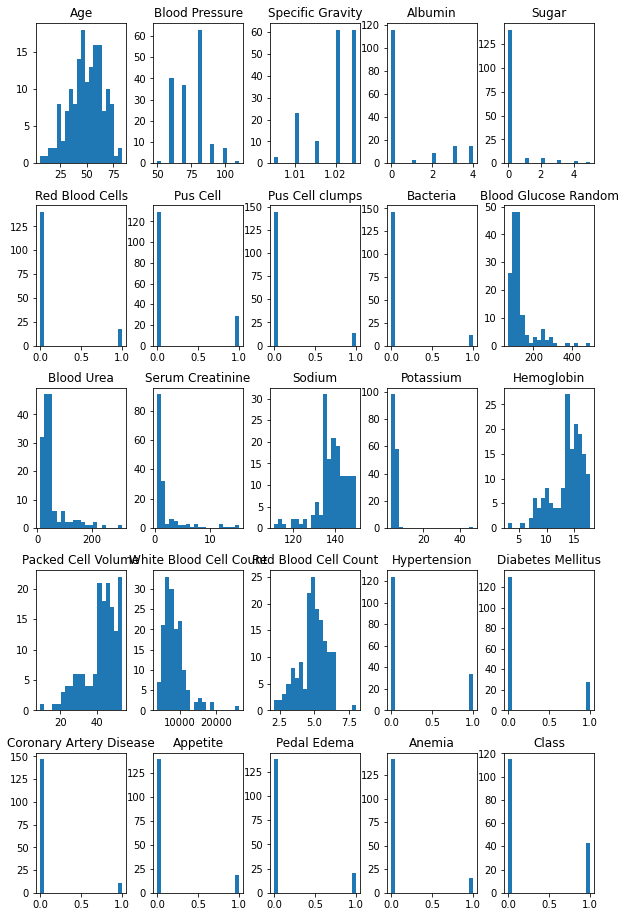

In [12]:
df.hist(figsize=(10,16),bins=20,grid = False)
plt.show()

In [13]:
corr_matrix = df.corr()

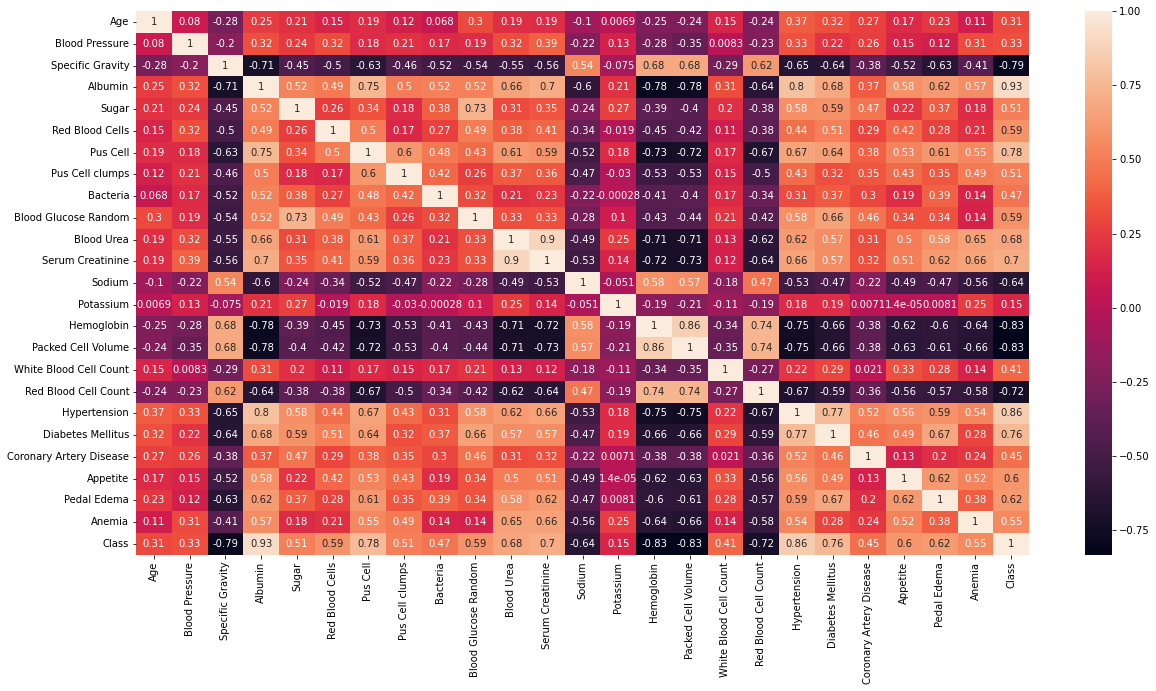

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix,annot = True)
plt.show()

# 4.1 Comparing Two samples

Checking normality : 

In [15]:
results = {}
for col in num_df.columns[:-1]:
    w, p = shapiro(num_df[col])
    results[col] = (w, p)

normal_columns = []
non_normal_columns = []
for i, (w, p) in results.items():
    if p > 0.05:
        normal_columns.append(i)
    else:
        non_normal_columns.append(i)

print('Normal columns:',normal_columns,',(W & P Values):',results[normal_columns[0]])

Normal columns: ['Age'] ,(W & P Values): (0.9849788546562195, 0.08524563908576965)


In [16]:
print(normal_columns)

['Age']


There is only one feature which is normal among the numerical value from the results of above of sapiro test.We fail to reject Ho for age since p_value is more than 0.05

In [17]:
multivariate_normality(num_df, alpha=.05)

HZResults(hz=1.5756432383932815, pval=0.0, normal=False)

From multivariate normality check we observe p_values is very small, we reject Ho

In [18]:
num_df
for i,col1 in enumerate(num_df.columns):
    for col2 in num_df.columns[i+1:]:
        statistic,p_value = stats.mannwhitneyu(num_df[col1], num_df[col2])
        if p_value > 0.05:
            print(col1,'&',col2,':',"{:.3f}".format(statistic),'&',"{:.3f}".format(p_value))
        

Specific Gravity & Serum Creatinine : 12166.000 & 0.695
Albumin & Class : 13241.500 & 0.230
Blood Urea & Packed Cell Volume : 10903.500 & 0.052


There are only three pairs with same population distribution among all the numerical features, we can observed from above result for Specific Gravity & Serum Creatinine ,Albumin & Class and Blood Urea & Packed Cell Volume  we fail to reject H0. For remaining all pairs we reject Ho since p_value is less than 0.05

# 4.2 The Analysis of Variance:

In [19]:
columns = num_df.columns
statistic, p_value = stats.kruskal(num_df[columns[0]],num_df[columns[1]],num_df[columns[2]],num_df[columns[3]],num_df[columns[4]],num_df[columns[5]],num_df[columns[6]],num_df[columns[7]],num_df[columns[8]],num_df[columns[9]],num_df[columns[10]],num_df[columns[11]],num_df[columns[12]],num_df[columns[13]])
if p_value > 0.05:
    print("{:.3f}".format(statistic), "{:.3f}".format(p_value))
    print('All means are same')
else:
    print("{:.3f}".format(statistic), "{:.3f}".format(p_value))
    print('Atleast one pair of means is not same')

2106.394 0.000
Atleast one pair of means is not same


Mann-whitney test result and k-w test results are implied to each other

# 4.3 The Analysis of Categorical Data:

In [20]:
import scikit_posthocs as sp

In [21]:
nemenyi = sp.posthoc_nemenyi(num_df.T.values)

In [22]:
nemenyi

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,1.000000e+00,8.690782e-01,1.161290e-27,3.585449e-46,7.438681e-55,8.439494e-03,1.000000e+00,1.995193e-25,1.904340e-05,2.034251e-10,4.474129e-02,9.999982e-01,4.082466e-13,3.253715e-08,8.557120e-53
2,8.690782e-01,1.000000e+00,1.623283e-44,3.617188e-67,1.712019e-77,9.514256e-01,5.939949e-01,1.081672e-41,3.311640e-01,1.118386e-21,8.294402e-08,3.439277e-01,7.510615e-05,1.924275e-18,4.691089e-75
3,1.161290e-27,1.623283e-44,1.000000e+00,7.694778e-01,1.494673e-01,1.441087e-62,1.098393e-24,1.000000e+00,8.753502e-74,2.568070e-01,4.563040e-08,1.594334e-22,5.312383e-97,5.153751e-02,2.588595e-01
4,3.585449e-46,3.617188e-67,7.694778e-01,1.000000e+00,9.999801e-01,7.848536e-89,2.445514e-42,5.362053e-01,4.989765e-102,2.037675e-06,2.659075e-19,1.615080e-39,6.548411e-129,2.279214e-08,9.999993e-01
5,7.438681e-55,1.712019e-77,1.494673e-01,9.999801e-01,1.000000e+00,1.357423e-100,1.107147e-50,5.240970e-02,1.401888e-114,6.136897e-10,3.887017e-25,1.329018e-47,6.341610e-143,2.352381e-12,1.000000e+00
6,8.439494e-03,9.514256e-01,1.441087e-62,7.848536e-89,1.357423e-100,1.000000e+00,8.801753e-04,3.115608e-59,9.999202e-01,6.540785e-35,1.912341e-16,1.163477e-04,2.989452e-01,8.433485e-31,7.955041e-98
7,1.000000e+00,5.939949e-01,1.098393e-24,2.445514e-42,1.107147e-50,8.801753e-04,1.000000e+00,1.423379e-22,7.086887e-07,1.288358e-08,1.800311e-01,1.000000e+00,2.532749e-15,1.241105e-06,1.064830e-48
8,1.995193e-25,1.081672e-41,1.000000e+00,5.362053e-01,5.240970e-02,3.115608e-59,1.423379e-22,1.000000e+00,3.603639e-70,4.845779e-01,6.982481e-07,1.663579e-20,7.192719e-93,1.475154e-01,1.072505e-01
9,1.904340e-05,3.311640e-01,8.753502e-74,4.989765e-102,1.401888e-114,9.999202e-01,7.086887e-07,3.603639e-70,1.000000e+00,1.687515e-43,1.462388e-22,4.333220e-08,9.397095e-01,6.482363e-39,1.247419e-111
10,2.034251e-10,1.118386e-21,2.568070e-01,2.037675e-06,6.136897e-10,6.540785e-35,1.288358e-08,4.845779e-01,1.687515e-43,1.000000e+00,4.322212e-01,2.325179e-07,7.217209e-62,1.000000e+00,4.667636e-09


In [23]:
nemenyi > 0.05

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False
2,True,True,False,False,False,True,True,False,True,False,False,True,False,False,False
3,False,False,True,True,True,False,False,True,False,True,False,False,False,True,True
4,False,False,True,True,True,False,False,True,False,False,False,False,False,False,True
5,False,False,True,True,True,False,False,True,False,False,False,False,False,False,True
6,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
7,True,True,False,False,False,False,True,False,False,False,True,True,False,False,False
8,False,False,True,True,True,False,False,True,False,True,False,False,False,True,True
9,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
10,False,False,True,False,False,False,False,True,False,True,True,False,False,True,False


In [24]:
columns = cat_df.columns[:-1]

from scipy.stats import chi2_contingency
from scipy.stats import chisquare, chi2_contingency, chi2


results = []
for i,col1 in enumerate(columns):
    for col2 in cat_df.columns[i+1:]:
        
        contingencyTable = pd.crosstab(cat_df[col1],cat_df[col2])
        stat, p, dof, expected = chi2_contingency(contingencyTable)
        
        prob = 0.95
        critical = chi2.ppf(prob, dof)
        
        if abs(stat) >= critical:
            print(col1,'&',col2,':Dependent (reject H0)')
        else:
            print(col1,'&',col2,'Independent (fail to reject H0)')

    

Red Blood Cells & Pus Cell :Dependent (reject H0)
Red Blood Cells & Pus Cell clumps Independent (fail to reject H0)
Red Blood Cells & Bacteria :Dependent (reject H0)
Red Blood Cells & Hypertension :Dependent (reject H0)
Red Blood Cells & Diabetes Mellitus :Dependent (reject H0)
Red Blood Cells & Coronary Artery Disease :Dependent (reject H0)
Red Blood Cells & Appetite :Dependent (reject H0)
Red Blood Cells & Pedal Edema :Dependent (reject H0)
Red Blood Cells & Anemia :Dependent (reject H0)
Pus Cell & Pus Cell clumps :Dependent (reject H0)
Pus Cell & Bacteria :Dependent (reject H0)
Pus Cell & Hypertension :Dependent (reject H0)
Pus Cell & Diabetes Mellitus :Dependent (reject H0)
Pus Cell & Coronary Artery Disease :Dependent (reject H0)
Pus Cell & Appetite :Dependent (reject H0)
Pus Cell & Pedal Edema :Dependent (reject H0)
Pus Cell & Anemia :Dependent (reject H0)
Pus Cell clumps & Bacteria :Dependent (reject H0)
Pus Cell clumps & Hypertension :Dependent (reject H0)
Pus Cell clumps & Dia

# 4.4 Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score as acc

In [26]:
 df1 = df.copy()

In [27]:
target = df1.pop('Class')
features = df1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

In [29]:
model = LogisticRegression(solver='lbfgs',max_iter = 500)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)

In [30]:
test_score,train_score

(0.96875, 1.0)

In [31]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [32]:
confusion_mat_test = confusion_matrix(y_test, y_pred_test)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)

print(confusion_mat_test)
print(confusion_mat_train)

[[23  0]
 [ 1  8]]
[[92  0]
 [ 0 34]]


0.9903381642512078


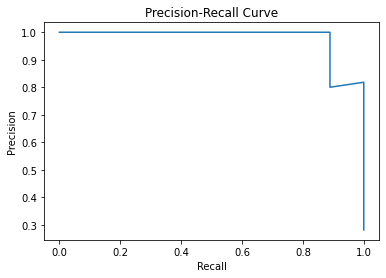

In [33]:
y_pr = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_pr)

print(auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pr)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# 4.5 Resampling Methods

In [34]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x_new_test = []
x_new_train = []

for i in range(2,10):
    k = i
    selector = SelectKBest(chi2, k=k)
    X_new_train = selector.fit_transform(X_train, y_train)
    X_new_test = selector.fit_transform(X_test, y_test)
    x_new_test.append(X_new_test)
    x_new_train.append(X_new_train)
    

In [35]:
test_scores = []
train_scores = []
for i in range(8):
    
    model = LogisticRegression(solver='lbfgs',max_iter = 500)
    model.fit(x_new_train[i], y_train)
    test_score = model.score(x_new_test[i], y_test)
    train_score = model.score(x_new_train[i], y_train)
    test_scores.append(test_score)
    train_scores.append(train_score)

In [36]:
test_scores

[0.9375, 0.96875, 0.28125, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875]

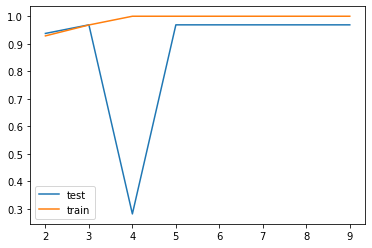

In [37]:
x = [i for i in range(2,10)]
plt.plot(x,test_scores,label = 'test')
plt.plot(x,train_scores,label = 'train')
plt.legend()

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [39]:
clf = model = LogisticRegression(solver='lbfgs',max_iter = 500)
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished

[2022-12-16 23:56:06] Features: 1/5 -- score: 0.984[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2022-12-16 23:56:06] Features: 2/5 -- score: 0.992[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s finished

[2022-12-16 23:56:07] Features: 3/5 -- score: 0.992[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining

In [40]:
feat_cols = list(sfs1.k_feature_idx_)
feat_cols

[0, 1, 2, 3, 15]

In [41]:
clf  = LogisticRegression(solver='lbfgs',max_iter = 500)
sfs1 = sfs(clf,
           k_features=5,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.5s finished

[2022-12-16 23:56:09] Features: 23/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished

[2022-12-16 23:56:11] Features: 22/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.5s finished

[2022-12-16 23:56:12] Features: 21/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:  

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.8s finished

[2022-12-16 23:56:22] Features: 12/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2022-12-16 23:56:25] Features: 8/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

In [42]:
feat_cols = list(sfs1.k_feature_idx_)
feat_cols

[1, 9, 10, 12, 16]

In [43]:
X_train.iloc[:, feat_cols].head()

,Blood Pressure,Blood Glucose Random,Blood Urea,Sodium,White Blood Cell Count
137,70.0,97.0,27.0,145.0,6400.0
55,80.0,118.0,18.0,135.0,7200.0
126,80.0,81.0,15.0,141.0,10500.0
84,60.0,137.0,17.0,150.0,7900.0
154,70.0,75.0,31.0,141.0,7800.0


In [44]:
clf  = LogisticRegression(solver='lbfgs',max_iter = 500)
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 1.000
Testing accuracy on selected features: 0.969


# 4.6 PCA

In [45]:
X = df.drop(['Class'], axis=1)
y = df['Class']

X_train = pd.DataFrame(X_train, columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.99995) + 1
print('The number of dimensions required to preserve 99.99% of variance is',dim)

The number of dimensions required to preserve 99.99% of variance is 3


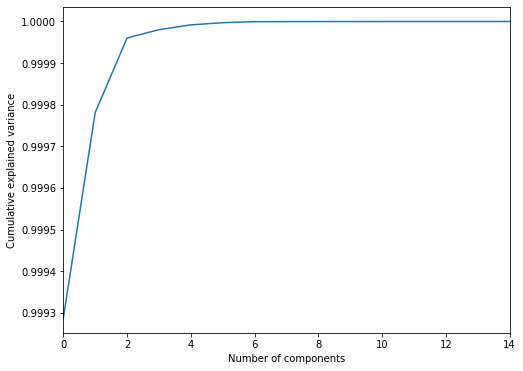

In [46]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()